# Netflix Stock Price Predictions

Author: Courtney Rena Vasquez

Course Project, UC Irvine, Math 10, F23

## Introduction

I created a project examining Netflix's stocks. While my dataset is a very clean and well produced dataset, the stock market is not clean or very predictable in the long run. however, using machine learning we can define and produce trends throughout the data we are given and studied.

## Cleaning The Data

In [ ]:
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

dropping any possible missing data and setting the dataset up.

In [ ]:
df = pd.read_csv("NFLX.csv")
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Now I want to be able to categorize the data by the specific days and years.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

calculate the differences between the high/low and open prices

In [ ]:
df["Dif_L"]=df["Open"]-df["Low"]
df["Dif_h"]=df["High"]-df["Open"]

calculate the difference between the open and close market price of stocks so that we can understand if they are worth trading or not.

In [ ]:
df["Value"]=df["Close"]-df["Open"]

a simpler numerical value to if its worth trading of not

In [ ]:
df["Worth"]= 0 
for n in df.index:
    if df.loc[n,"Value"]>=0:
        df.loc[n,"Worth"]=1 

## Part 1: Graphs and Analyzing Trend Visually

I'm going to start off making a graph of all data points from February 2018 to February 2022, so that we can see the overarching trend of Netflix's stock price.

In [ ]:
all_data = alt.Chart(df).mark_line().encode(
    x =alt.X("Date:T", title="Date"),
    y =alt.Y("Close:Q", title = "Price"),
    tooltip=["Date","Close"]
)
all_data

alt.Chart(...)

Looking at the graph, we see that overall the price of stock went on an upwards overall trend until around the end of 2021, beginning of 2022. Seeing this, lets look into this specific price drop.

In [ ]:
end_dates = df.tail(70)
end = alt.Chart(end_dates).mark_line().encode(
    x =alt.X("Date:T", title="Date"),
    y =alt.Y("Close:Q", title = "Price"),
    tooltip=["Date","Close"]
)
end

alt.Chart(...)

While this doesn't look like a big drop, in reality if we think about it netflix lost almost 40% of its price of stock.

## Part 2: Linear Regression

In this section we are going to build a linear Regression model to predict the future trend of Netflix Stock using the train-test method. First we'll predict the trends of data we know from 2018-2019. 

create a data frame with just 2018 and 2019 values

In [ ]:
df_18 = df[(df['Year'] == 2018)]
df_19 = df[(df['Year'] == 2019)]
df1819 = pd.concat([df_18, df_19], ignore_index=True)

create a training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1819[['Open','High','Low']], df1819['Close'], test_size=0.2, random_state=42)

fit it to the linear regression model

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

get the predicted values for the training and test sets and then add them to the 2018-2019 data set

In [ ]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
df1819.loc[X_train.index, 'pred'] = y_train_pred
df1819.loc[X_test.index, 'pred'] = y_test_pred

create a graph of the real close market values of the netflix stock from 2018-2019

In [ ]:
real = alt.Chart(df1819).mark_line().encode(
    x = 'Date',
    y = 'Close',
    color = alt.value('darkgreen'),
    tooltip=["Date","Close"]
)
real

alt.Chart(...)

create a graph of the predicted close market values of the netflix stock from 2018-2019

In [ ]:
predicted = alt.Chart(df1819).mark_line().encode(
    x = 'Date',
    y = 'pred',
    color = alt.value('cyan'),
    tooltip=["Date","pred"]
)
predicted

alt.Chart(...)

Overlay the graphs in order to see the difference between the real and predicted values. You can tell here that the regression model was able to predict the values very well.

In [ ]:
pred_real = real+predicted
pred_real

alt.LayerChart(...)

I pulled the score values of the training and test sets to show that the training set is not overfitting and that the model is accurate. The test set is very important so that we can see if the model is ready for use with unseen data and since we got such similar scores we can successfully conclude that.

In [ ]:
reg.score(X_train, y_train)

0.9944507908768838

In [ ]:
reg.score(X_test, y_test)

0.993643810934093

## Part 3: k-NN Classifier to Find Outliers

After using this I found out that my data actually had no outliers, but decided to leave it in because I believe it is an important piece of data found.

I prepared my data by removing anything that was not a value related to stock price

In [ ]:
dfd = df.drop('Date', axis = 1)
dfd = dfd.drop('Year', axis = 1)
dfd = dfd.drop('Volume', axis = 1)
X = dfd.values

Here I trained the k-NN model, I changed the value of k a lot and couldn't see a difference so I left it at 20

In [ ]:
k = 20
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X)

NearestNeighbors(n_neighbors=20)

Then I calculated the distance between each data point and their neighbors

In [ ]:
distances, indices = knn_model.kneighbors(X)

I defined what is considered an outlier here

In [ ]:
threshold = 500
outliers = np.where(distances > threshold)[0]
outliers

array([], dtype=int64)

I decided to use plt to plot the data and make it easier to see and understand

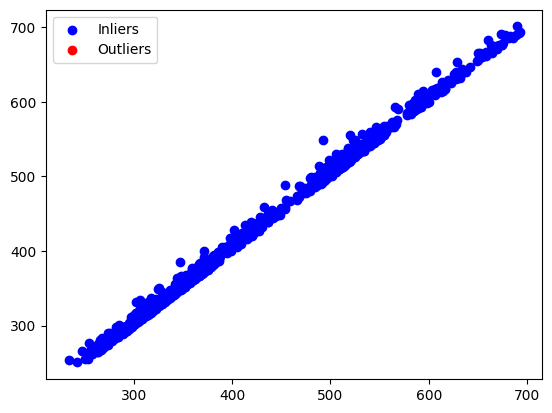

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Inliers')
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', label='Outliers')
plt.legend()
plt.show()

Overall, this seemed to fail because the data set has no missing values and no crazy values, it is very precise and accurate.

## Part 4: k-NN Classification

This seemed to work better for me. I decided to use the values I found earlier while cleaning the dataset to creat training and test sets between the years 2018 and 2019 to find what stocks were worth trading on what day/time.

here i defined the training set

In [ ]:
X_train2=df_18[["Dif_h","Dif_L"]]
y_train2=df_18["Worth"]

then I fit the k-NN classifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train2, y_train2)

KNeighborsClassifier()

Next I had to drop the year category because it is very unnecessary to this particular set of data and made parts of the table light up that didn't mean anything

In [ ]:
df_18 = df_18.drop('Year', axis = 1)
df_19 = df_19.drop('Year', axis = 1)

I defined the test set next

In [ ]:
X_test2=df_19[["Dif_h","Dif_L"]]
y_test2=df_19["Worth"]

In [ ]:
df_19.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dif_L,Dif_h,Value,Worth
228,2019-01-02,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,2.700012,10.470001,8.380005,1
229,2019-01-03,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,5.770019,5.589997,1.000000,1
230,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,3.339996,15.919983,15.690002,1
231,2019-01-07,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.450012,14.699982,13.239990,1
232,2019-01-08,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,11.970001,0.609985,0.289978,1


I used the classsifier to make a prediction on the test set

In [ ]:
df_19["Pred2"] = classifier.predict(X_test2)

In order to better visualize whether the stock is worth trading, I hightlight the value that is 1, which means worth trading.

In [ ]:
df_19.style.highlight_max(color = 'lightgreen', axis = 0)

,Date,Open,High,Low,Close,Adj Close,Volume,Dif_L,Dif_h,Value,Worth,Pred2
228,2019-01-02 00:00:00,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,2.700012,10.470001,8.380005,1,1
229,2019-01-03 00:00:00,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,5.770019,5.589997,1.000000,1,0
230,2019-01-04 00:00:00,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,3.339996,15.919983,15.690002,1,1
231,2019-01-07 00:00:00,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,0.450012,14.699982,13.239990,1,1
232,2019-01-08 00:00:00,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,11.970001,0.609985,0.289978,1,0
233,2019-01-09 00:00:00,317.709991,323.350006,313.500000,319.959991,319.959991,13343200,4.209991,5.640015,2.250000,1,0
234,2019-01-10 00:00:00,314.570007,325.369995,312.500000,324.660004,324.660004,13472500,2.070007,10.799988,10.089997,1,1
235,2019-01-11 00:00:00,330.959991,341.089996,328.519989,337.589996,337.589996,19500400,2.440002,10.130005,6.630005,1,1
236,2019-01-14 00:00:00,334.239990,335.480011,329.130005,332.940002,332.940002,10499600,5.109985,1.240021,-1.299988,0,0
237,2019-01-15 00:00:00,349.600006,357.220001,347.000000,354.640015,354.640015,21181200,2.600006,7.619995,5.040009,1,1


## Summary

Overall, throughout this project I created an examination of Netflix's stocks. I built a linear Regression model to predict the future trend of Netflix Stock using the train-test method. Then I created a K - Nearest Neighbor (KNN) Classification in order to classify which stocks were worth trading.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

Kaggle: https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction

* List any other references that you found helpful.

I used this website to learn about K - nearest neighbor classification and how to produce the codes to further my project https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.